In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
directory = "lyric_files"
dfs = []
song_counts = {}

for filename in os.listdir(directory):
    if ".csv" not in filename: 
        continue
    
    path = f"{directory}/{filename}"
    df = pd.read_csv(path)
    dfs.append(df)

In [3]:
df = pd.concat(dfs)
df.Rapper.value_counts()

Lil' Wayne           824
Snoop Dogg           550
Eminem               414
Nas                  408
Jay-Z                312
2Pac                 275
DMX                  259
Scarface             188
Tip 'T.I.' Harris    169
Jadakiss             164
Notorious B.I.G.     130
Rakim                 53
André 3000            15
Name: Rapper, dtype: int64

In [4]:
path = "example_dataset/lyrics_dataset.csv"
df2 = pd.read_csv(path)
df2.Rapper.value_counts()

techn9ne         639
eminem           411
nas              359
50cent           349
jayz             311
2pac             269
jcole            255
icecube          196
kendricklamar    192
outkast          145
dax              138
notorious        130
nf               108
eazye             59
rakim             53
Name: Rapper, dtype: int64

In [5]:
duplicate = ["eminem", "nas", "jayz", "2pac", "notorious", "rakim"]
for d in duplicate:
    df2 = df2[df2["Rapper"] != d]
df2.Rapper.value_counts()

techn9ne         639
50cent           349
jcole            255
icecube          196
kendricklamar    192
outkast          145
dax              138
nf               108
eazye             59
Name: Rapper, dtype: int64

In [6]:
df = pd.concat([df, df2])

In [7]:
df

,Unnamed: 0,Rapper,Title,Lyrics
0,0.0,Tip 'T.I.' Harris,Still Ain't Forgave Myself,\n\n Still ain't forgave myself.. damn\r\nIt'...
1,1.0,Tip 'T.I.' Harris,Dope Boyz,"\r\nAy, ay, ay, what you need shawty\r\nAy sha..."
2,2.0,Tip 'T.I.' Harris,What Happened,\r\nDez niggas robbing me\r\nPray to God is no...
3,3.0,Tip 'T.I.' Harris,You Ain't Hard,I done been locked up wit the worsest of nigga...
4,4.0,Tip 'T.I.' Harris,I'm Serious,\r\nAy take a good look at me - Now picture me...
...,...,...,...,...
3609,NaN,dax,Who Run It (Gherbo Remix),"Ayy I don't give a fuck what nobody says, this..."
3610,NaN,dax,Why So Serious,Last time that I talked to you guys you though...
3611,NaN,dax,XXL Freshman Freestyle,What I said before\nThis is a sport\nOnly the ...
3612,NaN,dax,YourWorthIt.org,"\nAyee if no ones told you this today, I'ma te..."


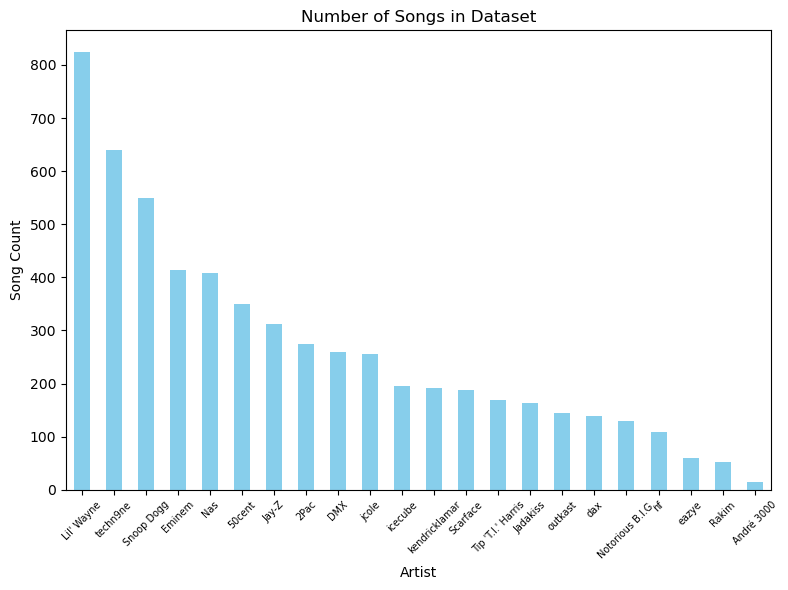

In [15]:
value_counts = df['Rapper'].value_counts()

plt.figure(figsize=(8, 6))
value_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Artist')
plt.ylabel('Song Count')
plt.title('Number of Songs in Dataset')
plt.xticks(rotation=45, fontsize=7)  # Adjust the fontsize as needed
plt.tight_layout()
plt.show()

<AxesSubplot:>

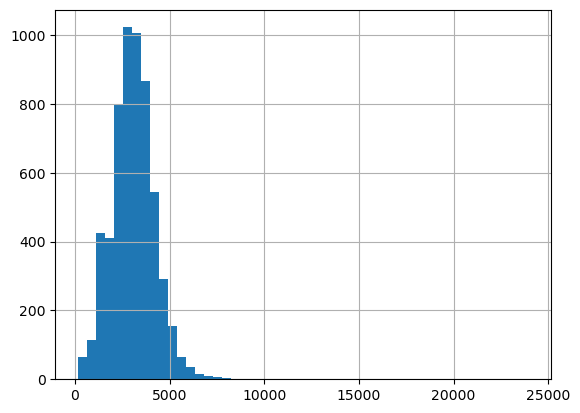

In [17]:
df['lyric_len'] = df['Lyrics'].apply(len)
df['lyric_len'].hist(bins=50)

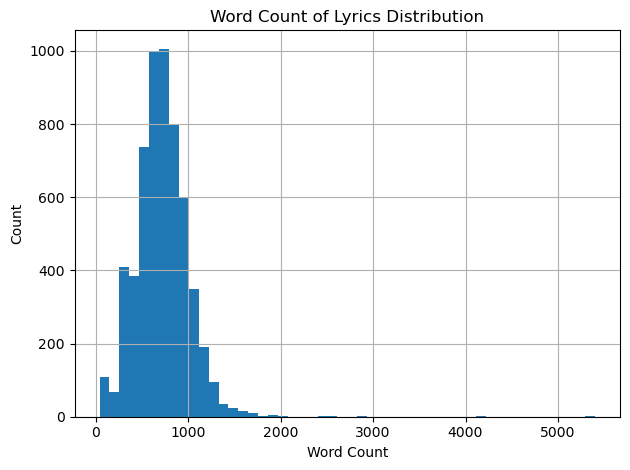

In [20]:
from nltk.tokenize import word_tokenize

df['word_count'] = df['Lyrics'].apply(lambda x: len(word_tokenize(x)))
df['word_count'].hist(bins=50)
plt.xlabel('Word Count')
plt.ylabel('Count')
plt.title('Word Count of Lyrics Distribution')
plt.tight_layout()
plt.show()

In [24]:
from sklearn.model_selection import train_test_split


train, test = train_test_split(df, test_size=0.05)

train.to_csv("train_final.csv")
test.to_csv("test_final.csv")

In [8]:
# Epoch
# Training Loss
# Validation Loss
loss = [[1,
3.706500,
3.585943],
[2,
3.596300,
3.527377],
[3,
3.514700,
3.491762],
[4,
3.479400,
3.467860],
[5,
3.449400,
3.457516],
[6,
3.418500,
3.446741],
[7,
3.400500,
3.440565],
[8,
3.382500,
3.436403],
[9,
3.362800,
3.433007],
[10,
3.382500,
3.431244]]



In [10]:
epoch = [l[0] for l in loss]
train_loss = [l[1] for l in loss]
val_loss = [l[2] for l in loss]

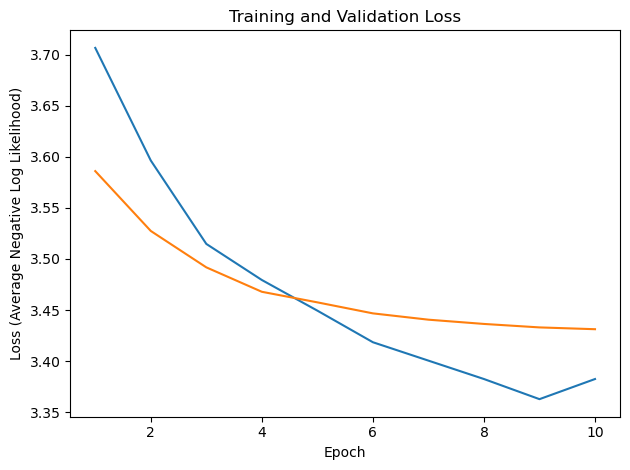

In [13]:
plt.plot(epoch, train_loss)
plt.plot(epoch, val_loss)
plt.xlabel('Epoch')
plt.ylabel('Loss (Average Negative Log Likelihood)')
plt.title('Training and Validation Loss')
plt.tight_layout()
plt.show()